Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 62s 138ms/step - accuracy: 0.5224 - loss: 1.1873 - val_accuracy: 0.6623 - val_loss: 0.8505
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 76us/step - accuracy: 0.6562 - loss: 0.4195 - val_accuracy: 0.6667 - val_loss: 0.3864
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 139ms/step - accuracy: 0.7203 - loss: 0.7505 - val_accuracy: 0.7732 - val_loss: 0.6072
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.6562 - loss: 0.3660 - val_accuracy: 0.9167 - val_loss: 0.1913
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 65s 147ms/step - accuracy: 0.7805 - loss: 0.5895 - val_accuracy: 0.8138 - val_loss: 0.5394
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 68us/step - accuracy: 0.6250 - loss: 0.4778 - val_accuracy: 0.8333 - val_loss: 0.2461
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 139ms/step - accuracy: 0.8149 - loss: 0.5258 - val_accuracy: 0.8101 - val_loss: 0.4995
Epoc

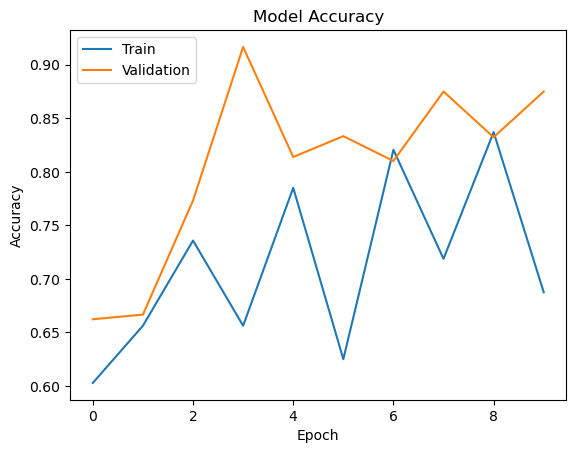

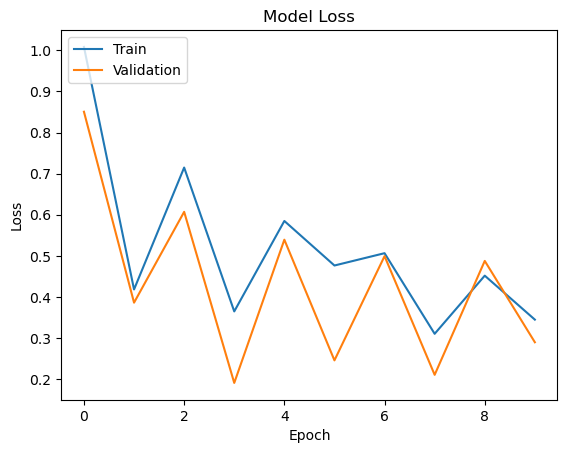

94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8265 - loss: 0.5010
Validation Accuracy: 83.07%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

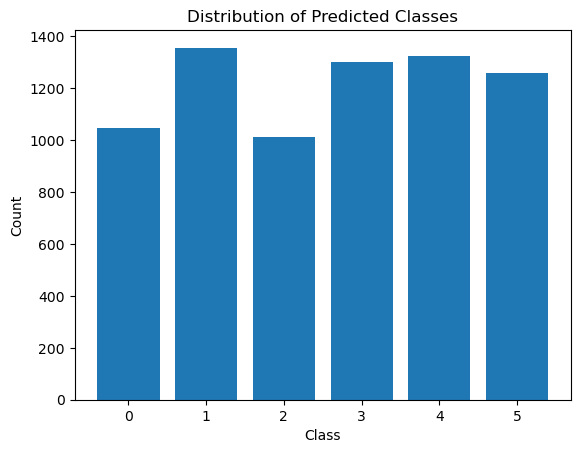

In [3]:
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

warnings.filterwarnings('ignore')

# Define paths to the dataset
train_data_dir = 'seg_train'
test_data_dir = 'seg_test'
pred_data_dir = 'seg_pred'  # Path to folder containing images for prediction

# Define parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 10
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
scores = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (scores[1] * 100))

# Predict on new images
pred_files = os.listdir(pred_data_dir)
predicted_classes = []

for file in pred_files:
    img_path = os.path.join(pred_data_dir, file)
    img = load_img(img_path, target_size=(img_width, img_height))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_classes.append(predicted_class)

# Plot distribution of predicted classes
unique_classes, class_counts = np.unique(predicted_classes, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predicted Classes')
plt.xticks(unique_classes)  # Set x-ticks to be the unique classes
plt.show()